# Setup the environment

In [1]:
# Set working directory
from google.colab import drive, files
drive.mount('/content/gdrive')
%cd './gdrive/My Drive/Multivariate Discounting/Scripts and Notebooks/'

Mounted at /content/gdrive
/content/gdrive/My Drive/Multivariate Discounting/Scripts and Notebooks


In [2]:
# Connect TPU, if desired
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.8.0
Running on TPU  ['10.102.111.218:8470']
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.102.111.218:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.102.111.218:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


# Import packages we'll need

In [3]:
# System
import os
import sys
from IPython.display import clear_output
import warnings
warnings.filterwarnings("ignore")

# Data Manipulation
import pandas as pd
import numpy as np

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Analytics
import statsmodels.api as sm
import statsmodels.formula.api as smf
from math import log
import scipy.stats as stats
from sklearn import metrics
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
!pip install shap
import shap
import random

# Script preference
pd.set_option("display.max_columns", None)

     |████████████████████████████████| 564 kB 5.0 MB/s 


# Make sure dataframe is ready for fitting

In [4]:
# Read in the data
df = pd.read_csv('../Data/01_raw/data_long.csv').drop(['Unnamed: 0'], axis=1)

#%% One hot encode categorical variables for predictions
encode_df = pd.DataFrame(df['indiff_point'])
encode_df.columns = ['indiff_point']
encode_df = pd.concat([encode_df, pd.get_dummies(df['Group'], prefix='Group')], axis=1)
encode_df = pd.concat([encode_df, pd.get_dummies(df['Commodity'], prefix='Commodity')], axis=1)
encode_df = pd.concat([encode_df, pd.get_dummies(df['Gain_Loss'], prefix='Gain_Loss')], axis=1)
encode_df = pd.concat([encode_df, pd.get_dummies(df['Delay_Prob'], prefix='Delay_Prob')], axis=1)
encode_df['Amount'] = df['Amount']
encode_df['IV'] = df['IV']
encode_df['pid'] = df['pid']
encode_df = encode_df.dropna()
encode_df = encode_df.reset_index(drop=True)

encode_df = encode_df.drop(['Group_Control', 'Gain_Loss_Loss', 'Delay_Prob_Probability'], axis=1)

encode_df[::500]

,indiff_point,Group_Cocaine,Commodity_Cocaine,Commodity_Health,Commodity_Money,Gain_Loss_Gains,Delay_Prob_Delay,Amount,IV,pid
0,0.75,1,1,0,0,1,1,100,1.000,GM33
500,0.98,1,0,0,1,0,1,10,182.625,DP39
1000,0.03,1,0,1,0,1,1,100,9125.000,SR51
1500,0.68,1,0,0,1,1,0,10,0.333,RJ58
2000,0.48,1,0,0,1,1,1,100,1825.000,RR70
2500,0.98,1,0,0,1,0,0,10,0.111,CB84
3000,0.00,1,0,1,0,0,1,1000,365.000,KW106
3500,0.76,0,0,0,1,1,0,100,1.000,CB15
4000,0.60,0,0,0,1,1,1,100,365.000,KC24
4500,0.32,0,0,0,1,1,0,100,3.000,RT29


# Functions

In [31]:
def calc_aic(n, loss, num_params):
  aic = n * log(loss) + 2 * num_params
  return aic

def calc_bic(n, loss, num_params):
  bic = n * log(loss) + num_params * log(n)
  return bic

def plot_pred(predictors, observed_data, title, save_name=None, 
              rand_state=5687463, model=None, plot_cond=False):
  # Fit the model
  if model=='RF':
      regr = RFR(max_depth=5, random_state=rand_state)
  elif model=='LR':
      regr = LinearRegression()
  elif model=='GBR':
      regr = GradientBoostingRegressor(random_state=rand_state)
  elif model=='ABR':
      regr = AdaBoostRegressor(random_state=rand_state)
  regr.fit(predictors, observed_data)
  try:
    num_params = len(regr.coef_) + 1
  except:
    num_params = np.nan
  r2 = regr.score(predictors, observed_data)
  predictions = regr.predict(predictors)
  mse = metrics.mean_squared_error(observed_data, predictions)
  rmse = np.sqrt(mse)
  mae = metrics.mean_absolute_error(observed_data, predictions)
  try:
    aic = calc_aic(n=len(observed_data), loss=mse, num_params=num_params)
  except:
    aic = np.nan
  try:
    bic = calc_bic(n=len(observed_data), loss=mse, num_params=num_params)
  except:
    bic= np.nan
  
  # Plot if desired
  if plot_cond==True:
    # Plot it
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.regplot(x=observed_data, y=regr.predict(predictors), color='k', )
    plt.title(title, fontsize=36, pad=16)
    ax.text(0.7, 0.08, r"$r^2=$"+f'{round(r2, 2)}', fontsize=24)
    plt.xticks(fontsize=20)
    plt.xlim(0, 1)
    plt.yticks(fontsize=20)
    plt.ylim(0, 1)
    plt.ylabel("Predicted Indifference Proportion", fontsize=30, labelpad=20)
    plt.xlabel("Observed Indifference Proportion", fontsize=30, labelpad=20)
    plt.savefig(f'../Figures/{save_name}.png', bbox_inches="tight")
    plt.show()

  return r2, mse, rmse, mae, aic, bic

def box_swarm(df, width=15, save_name=None, xlim=None, ylim=None):
  fig, ax = plt.subplots(figsize=(width, 12))
  sns.boxplot(x='variable', y='value', data=df, hue='group', dodge=True, palette='colorblind', 
              showmeans=True, meanprops={"marker":"*", 
                                         "markerfacecolor":"white", 
                                         "markeredgecolor":"black",
                                         "markersize":"18"})
  sns.swarmplot(x='variable', y='value', data=df, hue='group', dodge=True, alpha=0.5, color='k')
  plt.ylabel('Metric', fontsize=30, labelpad=16)
  plt.yticks(fontsize=16)
  plt.ylim(ylim)
  plt.xticks(fontsize=16)
  plt.xlim(xlim)
  plt.xlabel('', fontsize=20)
  plt.savefig(f'../Figures/{save_name}.png', bbox_inches='tight')
  plt.show()

# Random Forest
## Hyperparameters to tune:

*   n_estimators: Number of trees in the forest
*   max_depth: The maximum depth of each tree. 



## Modeling

In [6]:
# Grid search using RF
preds = list(encode_df)[1:-1] # Use all but participant id b/c we're fitting at the PID level
fit = []
vac = []
mse = []
mae = []
rmse = []
group = []
depth = []
ests = []

for i in range(0, 10):
  rand_state = int(round(random.random()*10000, 0))
  for n_est in [10, 50, 100, 250]:
    for max_depth in [10, 50, 100]:
      for p in encode_df['pid'].unique():
        # Isolate participant data
        temp_df = encode_df[encode_df['pid']==p].dropna()
        predictors = temp_df[preds].astype(float)
        observed_data = temp_df['indiff_point']
        temp_df = temp_df.reset_index(drop=True)
        # Fit RF regressor
        regr = RFR(n_estimators=n_est, max_depth=max_depth)
        regr.fit(predictors, observed_data)
        predictions = regr.predict(predictors)
        # Save loss metrics for this fit
        fit.append('RF')
        vac.append(regr.score(predictors, observed_data))
        mse.append(metrics.mean_squared_error(observed_data, predictions))
        rmse.append(np.sqrt(metrics.mean_squared_error(observed_data, predictions)))
        mae.append(metrics.mean_absolute_error(observed_data, predictions))
        if temp_df['Group_Cocaine'][0]==1:
          group.append('cocaine')
        else:
          group.append('control')
        depth.append(max_depth)
        ests.append(n_est)
        clear_output()
        print(f'Fitting model:\nIter: {i+1} of 10\nn_est: {n_est}\ndepth: {max_depth}\nPID: {p}')

fit_df_rf = pd.DataFrame({'fit':fit, 'vac':vac, 'mse':mse, 'rmse':rmse, 
                       'mae':mae, 'depth':depth, 'ests':ests, 'group':group})
fit_df_rf.to_csv(f'../Data/03_hyperparameter_tuning/param_tuning_RF.csv')

Fitting model:
Iter: 10 of 10
n_est: 250
depth: 100
PID: MG109


In [10]:
# Identify optimal hyperparams, on average
testing = fit_df_rf[fit_df_rf['vac']==fit_df_rf['vac'].max()]
testing = testing.append(fit_df_rf[fit_df_rf['mse']==fit_df_rf['mse'].min()])
testing = testing.append(fit_df_rf[fit_df_rf['rmse']==fit_df_rf['rmse'].min()])
testing = testing.append(fit_df_rf[fit_df_rf['mae']==fit_df_rf['mae'].min()])
testing = testing.drop_duplicates()
print(testing.sort_values(by=['mae'], ascending=True))
testing.describe()

     fit  vac           mse          rmse           mae  depth  ests    group
12    RF  1.0  1.110810e-32  1.053950e-16  5.776629e-17     10    10  cocaine
5088  RF  1.0  1.137704e-32  1.066632e-16  5.925320e-17     10    10  cocaine
1704  RF  1.0  1.198130e-32  1.094591e-16  6.341653e-17     10    10  cocaine
5135  RF  1.0  1.479626e-32  1.216399e-16  6.748074e-17     50    10  cocaine
1751  RF  1.0  1.479746e-32  1.216448e-16  6.782769e-17     50    10  cocaine
4618  RF  1.0  1.479746e-32  1.216448e-16  6.782769e-17    100    10  cocaine
623   RF  1.0  1.479851e-32  1.216491e-16  6.808790e-17     50    10  cocaine
5182  RF  1.0  1.479867e-32  1.216498e-16  6.817463e-17    100    10  cocaine
3443  RF  1.0  1.479867e-32  1.216498e-16  6.817463e-17     50    10  cocaine
3960  RF  1.0  1.479867e-32  1.216498e-16  6.817463e-17     10    10  cocaine
4054  RF  1.0  1.479987e-32  1.216547e-16  6.852158e-17    100    10  cocaine
670   RF  1.0  1.480589e-32  1.216794e-16  6.886852e-17    100  

,vac,mse,rmse,mae,depth,ests
count,25.0,2.500000e+01,2.500000e+01,2.500000e+01,25.000000,25.000000
mean,1.0,6.330597e-32,1.976548e-16,1.157378e-16,53.200000,18.000000
std,0.0,9.984929e-32,1.588977e-16,9.740804e-17,36.823905,16.329932
min,1.0,1.110810e-32,1.053950e-16,5.776629e-17,10.000000,10.000000
25%,1.0,1.479851e-32,1.216491e-16,6.808790e-17,10.000000,10.000000
50%,1.0,1.480589e-32,1.216794e-16,6.886852e-17,50.000000,10.000000
75%,1.0,1.541376e-32,1.241522e-16,7.337880e-17,100.000000,10.000000
max,1.0,2.589629e-31,5.088840e-16,3.066991e-16,100.000000,50.000000


Looks like n_ests of ~10 and depth of ~50 is the best on average. Use those hyperparmater values to fit everyone's model. 

In [11]:
# Isolate list of features
preds = list(encode_df)[1:-1] # All features but PID b/c we're fitting at the PID level

# Empty lists to store data in
pids = []
fit = []
vac = []
mse = []
mae = []
rmse = []
group = []
shap_vals = pd.DataFrame()

rand_state = int(round(random.random()*10000, 0))
for p in encode_df['pid'].unique():
  # Isolate participant data
  temp_df = encode_df[encode_df['pid']==p].dropna()
  predictors = temp_df[preds].astype(float)
  observed_data = temp_df['indiff_point']
  temp_df = temp_df.reset_index(drop=True)
  # Fir RF regressor
  regr = RFR(n_estimators=10, max_depth=50)
  model = regr.fit(predictors, observed_data)
  predictions = regr.predict(predictors)
  # Save loss metrics for this fit
  pids.append(p)
  fit.append('RF')
  vac.append(model.score(predictors, observed_data))
  mse.append(metrics.mean_squared_error(observed_data, predictions))
  rmse.append(np.sqrt(metrics.mean_squared_error(observed_data, predictions)))
  mae.append(metrics.mean_absolute_error(observed_data, predictions))
  if temp_df['Group_Cocaine'][0]==1:
    group.append('cocaine')
  else:
    group.append('control')
  depth.append(max_depth)
  ests.append(n_est)
  # Save shapley values
  explainer = shap.TreeExplainer(model)
  shap_values = explainer(predictors)
  shap_df = pd.DataFrame(shap_values.values)
  shap_df.columns = shap_values.feature_names
  shap_df['pids'] = p
  shap_vals = shap_vals.append(shap_df)
  clear_output()

fit_df_rf = pd.DataFrame({'fit':fit, 'vac':vac, 'mse':mse, 'rmse':rmse, 
                       'mae': mae, 'group': group, 'pids': pids})
fit_df_rf.to_csv(f'../Data/03_hyperparameter_tuning/final_RF_fits.csv')
shap_vals_rf.to_csv(f'../Data/04_final_fits/shap_values_RF.csv')

## Visualizations

In [14]:
# Change to long format for easier plotting
fit_long_rf = fit_df_rf.melt(id_vars=['fit', 'group', 'pids'], 
                          value_vars=['vac', 'mse', 'rmse', 'mae'])

# Show every 18th row
fit_long_rf[::18]

,fit,group,pids,variable,value
0,RF,cocaine,GM33,vac,0.958189
18,RF,cocaine,SL85,vac,0.990796
36,RF,control,AL32,vac,0.930994
54,RF,cocaine,SR51,mse,0.010858
72,RF,control,CB15,mse,0.005989
90,RF,control,JF95,mse,0.016844
108,RF,cocaine,RR70,rmse,0.045324
126,RF,control,JB26,rmse,0.055902
144,RF,cocaine,DP39,mae,0.048429
162,RF,cocaine,KW106,mae,0.046421


### Loss metrics

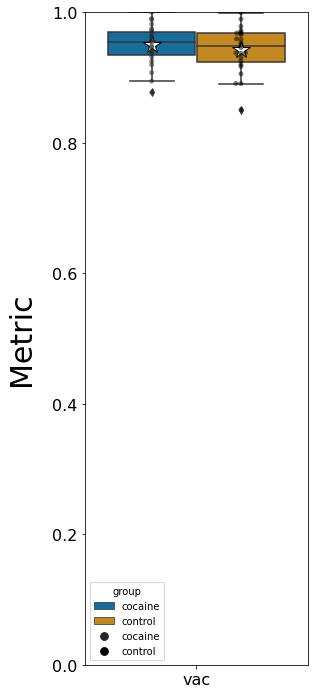

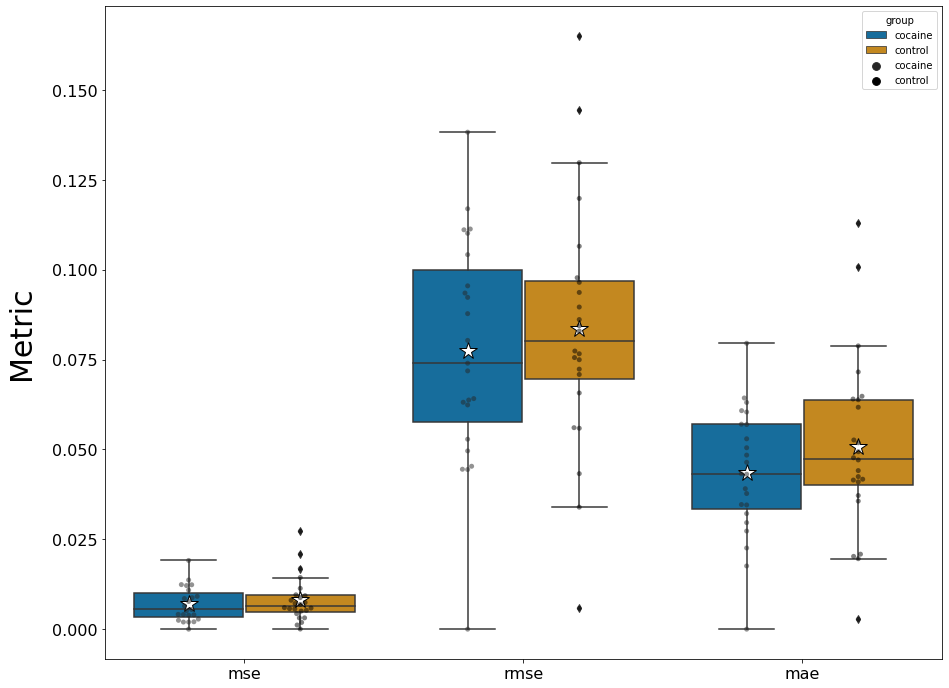

In [32]:
# Box and swarms for loss metrics
box_swarm(df=fit_long_rf[fit_long_rf['variable']=='vac'], width=4, ylim=(0, 1))
box_swarm(df=fit_long_rf[fit_long_rf['variable']!='vac'])

### Feature Importances

In [42]:
# CREATE DATAFRAME
#Create arrays from feature importance and feature names
feature_importance = np.array(model.feature_importances_)
feature_names = np.array(predictors.columns)

#Create a DataFrame using a Dictionary
data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
fi_df

,feature_names,feature_importance
7,IV,0.642857
5,Delay_Prob_Delay,0.156570
4,Gain_Loss_Gains,0.108334
6,Amount,0.069142
3,Commodity_Money,0.013198
2,Commodity_Health,0.009899
0,Group_Cocaine,0.000000
1,Commodity_Cocaine,0.000000


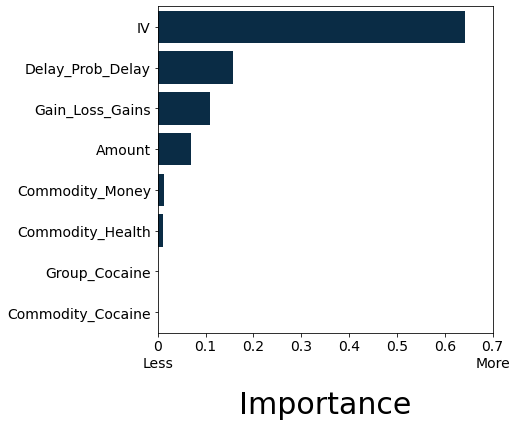

In [45]:
# Plot it
ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
labels = ['0\nLess', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7\nMore']
plt.figure(figsize=(6, 6))
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'], color='#002d4f')
plt.xlabel('Importance', fontsize=30, labelpad=20)
plt.xticks(ticks = ticks, 
           labels = labels, 
           fontsize=14)
plt.ylabel('', fontsize=30, labelpad=20, rotation=0)
plt.yticks(fontsize=14)
# plt.ylim(-0.5, 9.5)
plt.show()

### Shapley Values

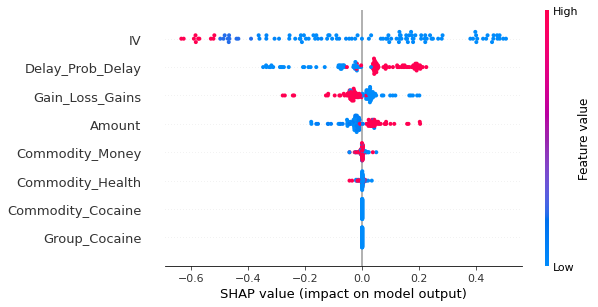

In [27]:
shap.summary_plot(shap_values_rf)

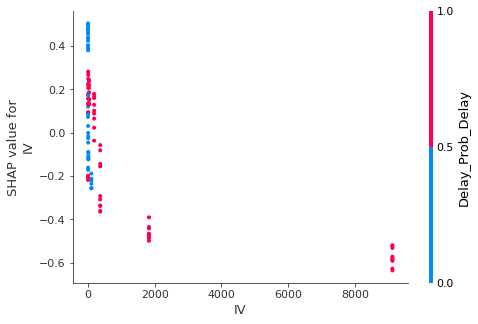

In [28]:
shap.dependence_plot('IV', shap_values_rf.values, predictors)

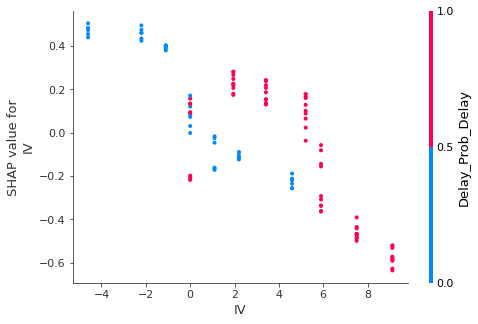

In [33]:
testing = predictors.copy()
testing['IV'] = np.log(testing['IV'])
shap.dependence_plot('IV', shap_values.values, testing)

In [38]:
shap_df

,Group_Cocaine,Commodity_Cocaine,Commodity_Health,Commodity_Money,Gain_Loss_Gains,Delay_Prob_Delay,Amount,IV,pids
0,0.0,0.0,0.008881,-0.000396,-0.032676,0.175530,-0.018090,0.266940,MG109
1,0.0,0.0,0.006925,-0.001139,-0.019771,0.191924,-0.021360,0.219611,MG109
2,0.0,0.0,0.007949,0.023324,-0.012117,0.145526,-0.023289,0.178796,MG109
3,0.0,0.0,-0.010704,-0.002927,-0.053429,0.050222,-0.109317,-0.336655,MG109
4,0.0,0.0,0.005597,-0.004119,-0.064684,0.038049,-0.024322,-0.466332,MG109
...,...,...,...,...,...,...,...,...,...
106,0.0,0.0,0.000675,0.000152,0.026359,-0.083852,0.040795,0.404060,MG109
107,0.0,0.0,0.000614,0.001147,0.032654,-0.181083,-0.008462,0.073320,MG109
108,0.0,0.0,0.000595,0.000493,0.074550,-0.207710,0.023754,-0.045493,MG109
109,0.0,0.0,0.000625,-0.000288,0.017270,-0.347785,0.025433,-0.123065,MG109


# Gradient Boosting
## Hyperparameters to tune:

* learning_rate: Shrinks contribution of each tree
* n_est: The number of boosting stages to perform
* max_depth: Max depth of the individual regression estimators

In [ ]:
# Grid search using RF
preds = list(encode_df)[1:-1]
fit = []
vac = []
mse = []
mae = []
rmse = []
group = []
depth = []
ests = []
l_rate = []

for i in range(0, 10):
  rand_state = int(round(random.random()*10000, 0))
  for n_est in [10, 50, 100, 250]:
    for max_depth in [10, 50, 100]:
      for rate in [0.001, 0.1, 1]
        for p in encode_df['pid'].unique():
          # Isolate participant data
          temp_df = encode_df[encode_df['pid']==p].dropna()
          predictors = temp_df[preds].astype(float)
          observed_data = temp_df['indiff_point']
          temp_df = temp_df.reset_index(drop=True)
          # Fir RF regressor
          regr = GBR(n_estimators=n_est, max_depth=max_depth, learning_rate=rate)
          regr.fit(predictors, observed_data)
          predictions = regr.predict(predictors)
          # Save loss metrics for this fit
          fit.append('GB')
          vac.append(regr.score(predictors, observed_data))
          mse.append(metrics.mean_squared_error(observed_data, predictions))
          rmse.append(np.sqrt(metrics.mean_squared_error(observed_data, predictions)))
          mae.append(metrics.mean_absolute_error(observed_data, predictions))
          if temp_df['Group_Cocaine'][0]==1:
            group.append('cocaine')
          else:
            group.append('control')
          depth.append(max_depth)
          ests.append(n_est)
          l_rate.append(rate)
          clear_output()
          print(f'Fitting model:\nIter: {i+1} of 10\nn_est: {n_est}\ndepth: {max_depth}\nPID: {p}')

fit_df = pd.DataFrame({'fit':fit, 'vac':vac, 'mse':mse, 'rmse':rmse, 'mae':mae, 
                       'depth':depth, 'ests':ests, 'lrate':l_rate, 'group':group})
fit_df.to_csv(f'../Data/03_hyperparameter_tuning/param_tuning_GB.csv')